# Task 6.2: Spotify--Exploring Relationships

1. Import Libraries
2. Import Data
3. Correlations & Heatmaps
4. Scatterplot
5. Pair Plots
6. Categorical Plots
7. Question & Answers
8. Hypothesis

## 1. Import Libraries

In [74]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 2. Import Data

In [75]:
# Create a shortcut for project folder path as a string.
path = r'/Users/cboyd/Documents/05-2022 Spotify Analysis'

In [76]:
# Import the “Database to calculate popularity_clean.pkl” data set into your notebook using the os library.
df_pop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Database to calculate popularity_clean.pkl'))

In [77]:
# Import the “Final database_clean.pkl” data set into your notebook using the os library.
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final database_clean.pkl'))

In [78]:
# Check columns
df_final.columns

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max',
       'Top10_dummy', 'Top50_dummy', 'Cluster'],
      dtype='object', length=151)

In [79]:
df_final.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


## 3. Correlations

In [80]:
df_final.corr()

,Popularity,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,...,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy
Popularity,1.000000,-0.046288,0.023008,0.054820,-0.054796,-0.070030,-0.023668,0.076104,-0.005650,-0.011153,...,0.009661,-0.026122,-0.032700,-0.032349,0.026110,-0.021127,-0.022506,-0.474391,0.556148,0.487570
Days_since_release,-0.046288,1.000000,-0.603351,0.173853,-0.173853,0.158846,0.094243,-0.181370,0.110700,0.008926,...,-0.012751,0.004318,-0.028445,0.004657,-0.006263,0.044751,-0.007188,0.084179,-0.049996,-0.075049
Released_after_2017,0.023008,-0.603351,1.000000,-0.203679,0.203679,-0.163578,-0.105819,0.188826,-0.072070,-0.043405,...,0.012081,0.005662,0.043948,-0.029981,-0.003439,-0.038573,0.022277,-0.117160,0.068160,0.102610
Explicit_false,0.054820,0.173853,-0.203679,1.000000,-0.999935,-0.116641,0.063591,0.101524,0.025808,0.051462,...,0.052034,0.029606,-0.082346,0.103712,0.027898,-0.027634,-0.097816,0.059602,-0.024005,-0.053757
Explicit_true,-0.054796,-0.173853,0.203679,-0.999935,1.000000,0.116711,-0.063585,-0.101472,-0.025806,-0.051456,...,-0.052104,-0.029594,0.082361,-0.103701,-0.027890,0.027647,0.097830,-0.059633,0.024025,0.053798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UK,-0.021127,0.044751,-0.038573,-0.027634,0.027647,0.044819,0.005703,-0.046362,-0.007041,0.011107,...,-0.032053,-0.041199,-0.043358,-0.043086,-0.028316,1.000000,-0.040187,0.011698,-0.009011,-0.014010
USA,-0.022506,-0.007188,0.022277,-0.097816,0.097830,0.053144,-0.011417,-0.050515,-0.007100,0.007568,...,-0.032319,-0.041542,-0.043719,-0.043444,-0.028551,-0.040187,1.000000,-0.019386,0.012644,0.024234
Popu_max,-0.474391,0.084179,-0.117160,0.059602,-0.059633,0.048749,0.021299,-0.054172,0.002577,0.025115,...,0.020954,-0.000140,-0.002613,0.037341,-0.006229,0.011698,-0.019386,1.000000,-0.453230,-0.759444
Top10_dummy,0.556148,-0.049996,0.068160,-0.024005,0.024025,-0.066829,-0.014724,0.070691,-0.007349,-0.017573,...,-0.008927,-0.008259,0.002511,-0.021368,0.008243,-0.009011,0.012644,-0.453230,1.000000,0.477492


In [81]:
print(df_final.columns)

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max',
       'Top10_dummy', 'Top50_dummy', 'Cluster'],
      dtype='object', length=151)


In [82]:
# Get all coulmn names 
for col_name in df_final.columns: 
    print(col_name)

Country
Uri
Popularity
Title
Artist
Album/Single
Genre
Artist_followers
Explicit
Album
Release_date
Track_number
Tracks_in_album
danceability
energy
key
loudness
mode
speechiness
acoustics
instrumentalness
liveliness
valence
tempo
duration_ms
time_signature
Genre_new
Days_since_release
Released_after_2017
Explicit_false
Explicit_true
album
compilation
single
bolero
boy band
country
dance/electronic
else
funk
hip hop
house
indie
jazz
k-pop
latin
metal
opm
pop
r&b/soul
rap
reggae
reggaeton
rock
trap
syuzhet_norm
bing_norm
afinn_norm
nrc_norm
syuzhet
bing
afinn
nrc
anger
anticipation
disgust
fear
joy
sadness
surprise
trust
negative
positive
n_words
anger_norm
anticipation_norm
disgust_norm
fear_norm
joy_norm
sadness_norm
surprise_norm
trust_norm
negative_norm
positive_norm
anger_norm2
anticipation_norm2
disgust_norm2
fear_norm2
joy_norm2
sadness_norm2
surprise_norm2
trust_norm2
negative_norm2
positive_norm2
negative_bog_jr
positive_bog_jr
Bayes
Negative_Bayes
Neutral_Bayes
Positive_Bayes


In [83]:
# Create a subset with only quantitative columns

df_final_sub = df_final[['Popularity','Days_since_release','Released_after_2017',
       'USA', 'Explicit_false', 'Explicit_true', 'single', 'Mexico',
       'Australia', 'rock','hip hop','country','k-pop','pop','rap','Top10_dummy']]

In [84]:
df_final_sub.corr()

,Popularity,Days_since_release,Released_after_2017,USA,Explicit_false,Explicit_true,single,Mexico,Australia,rock,hip hop,country,k-pop,pop,rap,Top10_dummy
Popularity,1.000000,-0.046288,0.023008,-0.022506,0.054820,-0.054796,0.076104,0.039313,0.012790,-0.034155,-0.064629,-0.011595,-0.031801,0.053245,-0.000596,0.556148
Days_since_release,-0.046288,1.000000,-0.603351,-0.007188,0.173853,-0.173853,-0.181370,0.031385,0.023782,0.283108,-0.121351,-0.000263,-0.045958,0.015788,-0.082677,-0.049996
Released_after_2017,0.023008,-0.603351,1.000000,0.022277,-0.203679,0.203679,0.188826,-0.038360,-0.021592,-0.150027,0.161093,-0.003271,0.052241,-0.056929,0.102604,0.068160
USA,-0.022506,-0.007188,0.022277,1.000000,-0.097816,0.097830,-0.050515,-0.026156,-0.031324,-0.004931,0.042974,0.099404,-0.014376,-0.034091,0.071660,0.012644
Explicit_false,0.054820,0.173853,-0.203679,-0.097816,1.000000,-0.999935,0.101524,0.044550,-0.014755,0.111776,-0.436622,0.045232,0.120555,0.270427,-0.260044,-0.024005
Explicit_true,-0.054796,-0.173853,0.203679,0.097830,-0.999935,1.000000,-0.101472,-0.044543,0.014765,-0.111766,0.436662,-0.045229,-0.120547,-0.270387,0.260067,0.024025
single,0.076104,-0.181370,0.188826,-0.050515,0.101524,-0.101472,1.000000,-0.005883,-0.023960,-0.085103,-0.099053,-0.005558,-0.009150,0.095454,-0.050347,0.070691
Mexico,0.039313,0.031385,-0.038360,-0.026156,0.044550,-0.044543,-0.005883,1.000000,-0.020219,0.000434,-0.048149,-0.007622,-0.010602,-0.012151,-0.024446,-0.002045
Australia,0.012790,0.023782,-0.021592,-0.031324,-0.014755,0.014765,-0.023960,-0.020219,1.000000,0.015541,-0.018234,0.003290,-0.002401,0.012444,0.016454,0.002313
rock,-0.034155,0.283108,-0.150027,-0.004931,0.111776,-0.111766,-0.085103,0.000434,0.015541,1.000000,-0.101207,-0.012605,-0.032418,-0.144668,-0.057709,-0.036890


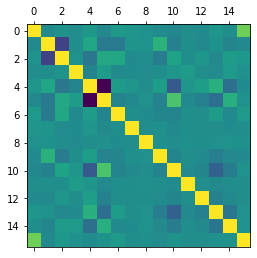

In [85]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_final_sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

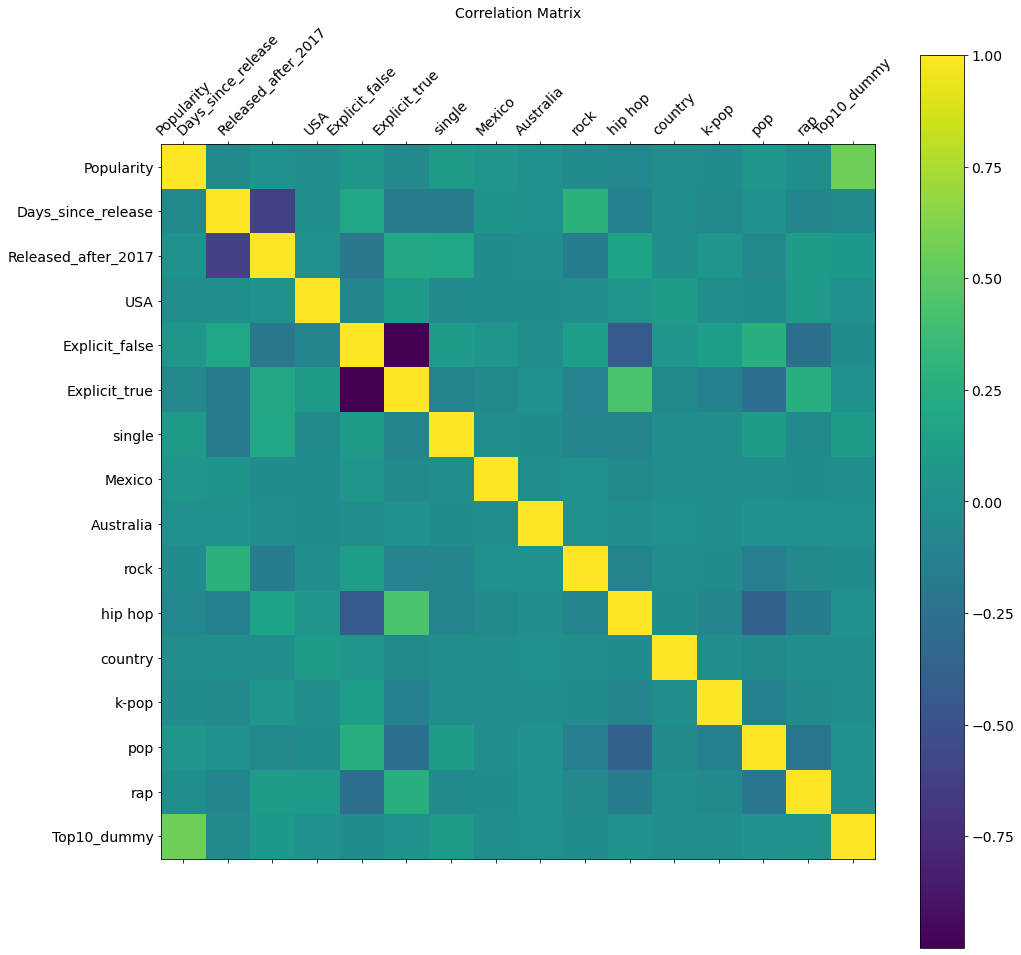

In [86]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(16, 16)) # figure size 
plt.matshow(df_final_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_final_sub.shape[1]), df_final_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_final_sub.shape[1]), df_final_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### I have decided to omit the countries as it doesnt seem to have much of an impact as the genres do.

In [87]:
# Create a subset excluding the country columns

df_final_sub_2 = df_final[['Popularity','Days_since_release','Released_after_2017','Explicit_false','Explicit_true', 'single','rock','hip hop','country', 'k-pop', 'pop', 'rap']]

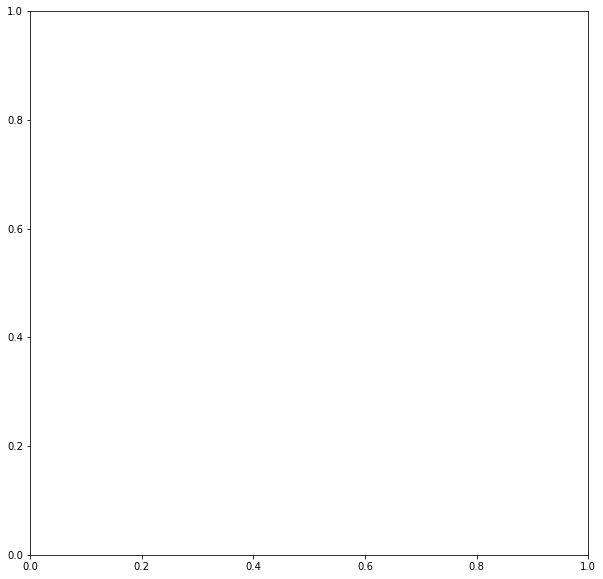

In [88]:
# Create a subplot with matplotlib. 
# It creates an empty output, but this is okay,it's just to show the subplots

f,ax = plt.subplots(figsize=(10,10))

In [89]:
# Create a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
df_final_sub2_corr_2 = sns.heatmap(df_final_sub_2.corr(), annot = True, ax = ax) 

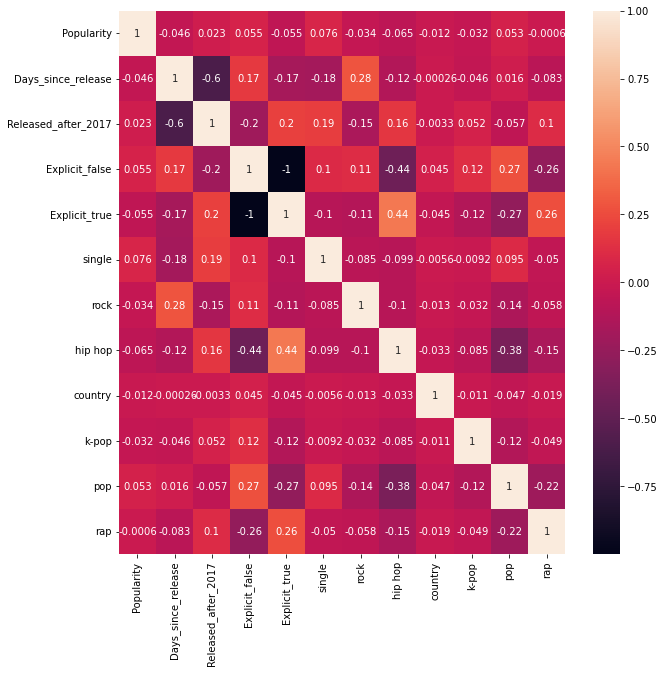

In [90]:
df_final_sub2_corr_2.figure

#### The only major correlation I see is that hip hop is correlated with Explicit language even more than rap. I think i'll have to look into the categories that the music is broken out into within the data.

In [91]:
# Create a subset with types of song messages columns

df_final_sub_3 = df_final[['Popularity','Popu_max','Days_since_release','Released_after_2017','anger','anticipation', 'disgust','fear','joy','sadness', 'trust', 'negative', 'positive', 'n_words', 'Top10_dummy', 'Top50_dummy']]

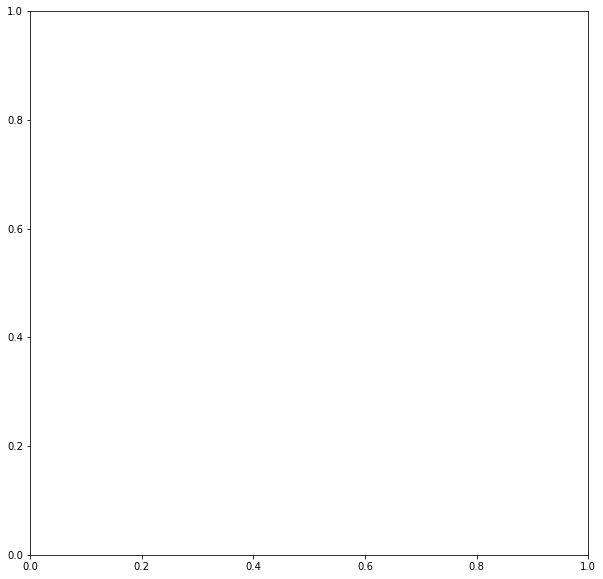

In [92]:
# Create a empty subplot with matplotlib. 
f,ax = plt.subplots(figsize=(10,10))

In [93]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

df_final_sub_3_corr_3 = sns.heatmap(df_final_sub_3.corr(), annot = True, ax = ax) 

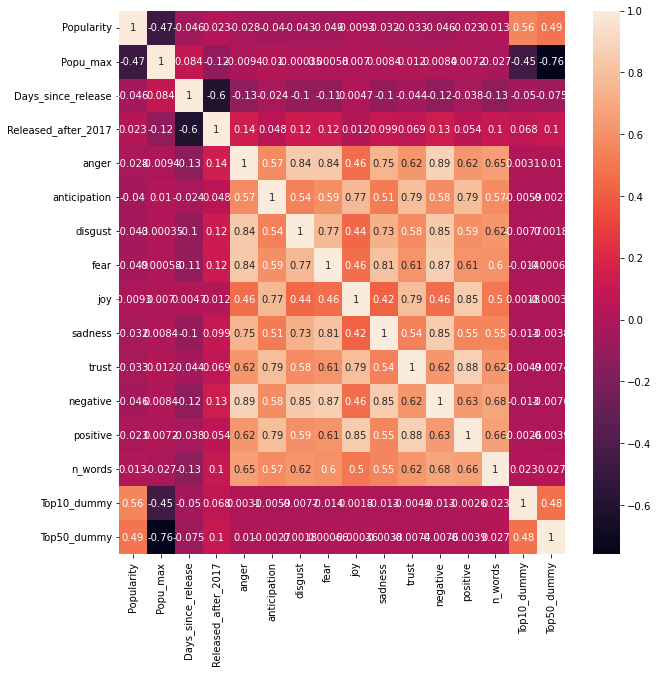

In [94]:
df_final_sub_3_corr_3.figure

#### There are many more correlations present with the types words associated with songs, there doe not seem to be a correlation with popularity with words though based on what is seen above. 

## 4. Scatterplots

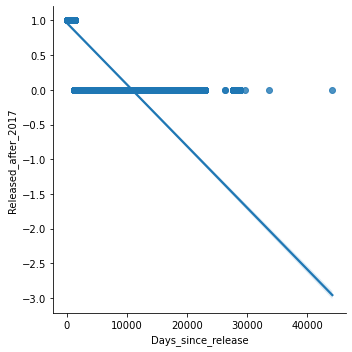

In [95]:
# Create a scatterplot 
sns.lmplot(x = 'Days_since_release', y = 'Released_after_2017', data = df_final)

#### There is a strong negative relationship present, as the trend line is very steep and many points are far away from the trend line. Therefore, theres a lot of variance present. 

#### The more days since a song was released, the more likely the song was released before 2017. 

## 5. Pair Plots

In [98]:
# Only keep the variables you want to use in the pair plot

df_final_sub_4 = df_final[['Popularity','Days_since_release','single','rock','hip hop','pop','rap','Top10_dummy']]

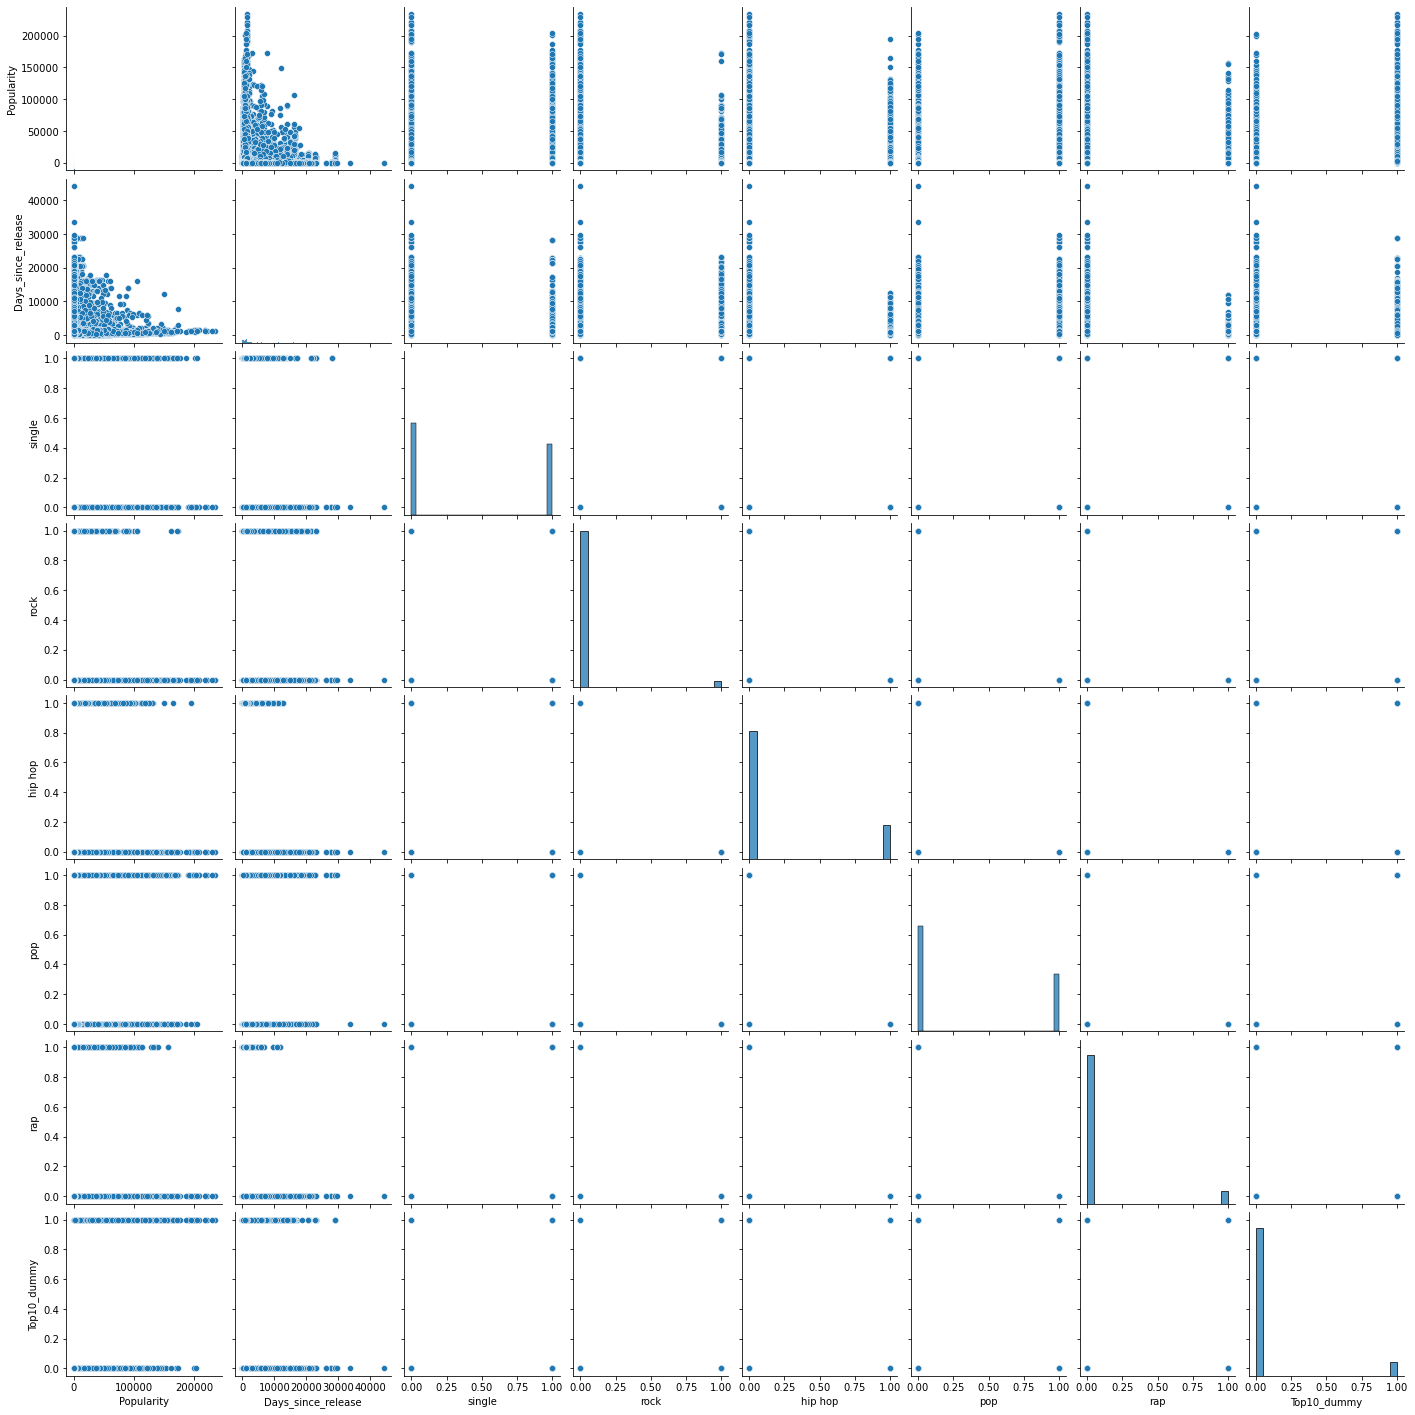

In [99]:
# Create a pair plot 

g = sns.pairplot(df_final_sub_4)

#### There are mostly ctegorical variables present, which dont tell us us a whole lot about the datas relationships. However, there seems to be a closer relationship between Popularity and Days_since_released that could be explored more. 

## 6. Categorical Plots

/Users/cboyd/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Popularity', ylabel='Density'>

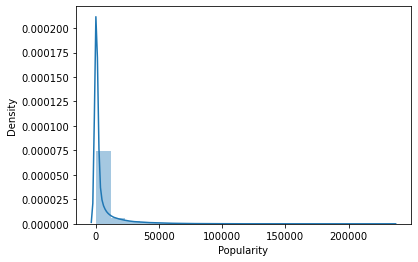

In [101]:
# Use a histogram (catplot) to visualize the distribution of the variables. 

sns.distplot(df_final['Popularity'], bins = 20)

In [103]:
# Based on the catplot, create some categories

df_final.loc[df_final['Popularity'] < 5000, 'Popularity category'] = 'Low popularity'

In [104]:
df_final.loc[(df_final['Popularity'] >= 5000) & (df_final['Popularity'] < 35000), 'Popularity category'] = 'Middle popularity'

In [105]:
df_final.loc[df_final['Popularity'] >= 35000, 'Popularity category'] = 'High popularity'

In [106]:
# Check work

df_final['Popularity category'].value_counts(dropna = False)

Low popularity       132963
Middle popularity     31125
High popularity        6545
Name: Popularity category, dtype: int64

In [107]:
# Save df_final as csv
df_final.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Final database_clean_6.2.csv'))

## 7. Questions & Answers

#### I can't answer the questions presented yet with the statistical data selected as it is all numeric and the questions pertain to categorical. 

#### However, it seems that hip hop is correlated with explicit language and that the music song lyrics match the mood of the song. 

#### Also, it is appartent that the popular songs hit the top 10 on the charts. I did not see anything pertaining to the country genre with regards to popularity or song choice.

## 8. Hypothesis

#### The more popular the song is, the more likely is will land in the top 50 on the charts.